In [1]:
# 1. data cleaning / prep
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# fill missing for age
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


<Figure size 432x288 with 0 Axes>

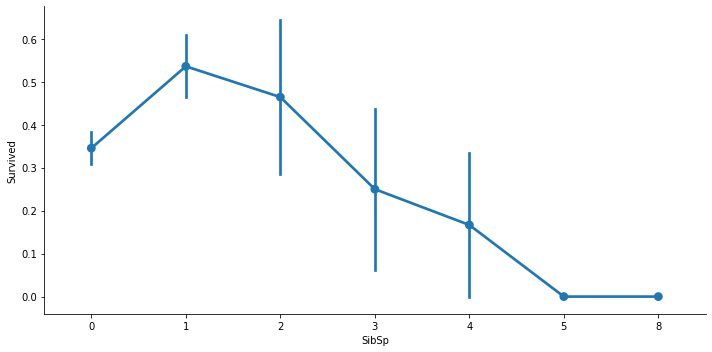

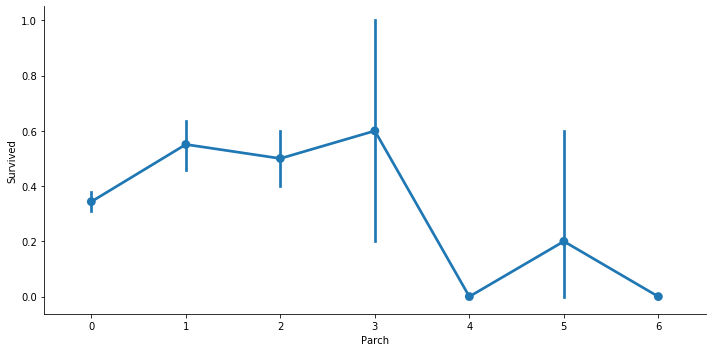

In [5]:
# Combine SibSp & Parch
for i, col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [7]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [8]:
# Drop unnecessaries
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [9]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [ ]:
import pandas as pd

titanic = pd.read_csv('titanic.csv')
# PassengerId is irrelevant in this case
# axis is 1 means drop column
# in place: stay the same dataset, noting new is being made
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.head()

In [ ]:
# Fill missing for Age
titanic.groupby(titanic['Age'].isnull()).mean()

In [ ]:
# Fill out the missing age value with the mean age value, so the data is not biased
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
# Fine out where are the missing values
titanic.isnull().sum()

In [ ]:
# Check is the missing value now the average value of the ages
titanic.head(10)

In [ ]:
# Combine SibSp & Parch
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
# Now the family cnt is the representitive of the both features, it becomes repetitive --- multicollinearity 
# The model would have a hard to to assign values to all of these features cause they all look the same to the
# model. It has negative consequences on the performance of the model.
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
titanic.head()

In [ ]:
# Drop all continuous features 
cont_feat = ['Pclass','Name','Age','Fare','Family_cnt']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

In [ ]:
# Now explore categorical features
titanic.info()

In [ ]:
# we can see some 891 but for cabin and embarked there are missing values.
titanic.groupby(titanic['Cabin'].isnull()).mean()
# No we see that for cabin there are too many missing values, so it is not worth it to averge the value in, 
# we just drop cabin.
# however the useful information here is the big gap between have cabin survived and do not have cabin survived.
# so this is useful

In [ ]:
# binary checking do they have a cabin
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head(10)

In [ ]:
# Plot categorical feature
for i, col in enumerate(['Cabin_ind', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)

In [ ]:
# pivot table used to compare between multiple features
titanic.pivot_table('Survived', index='Sex', columns='Embarked',aggfunc='count')
# the big difference in sex in S proves that female is more likely to survive.

In [ ]:
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked',aggfunc='count')
# the big difference in cabin in Q and S show that people with cabin are more likely to survive.

In [ ]:
# Finally cleaning the data after the whole learning process
import numpy as np
import pandas as pd

titanic = pd.read_csv('titanic.csv')
titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

In [ ]:
# Convert indicator for Cabin
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

In [ ]:
# Convert Sex to numeric
# numeric is easier for model to handle
gender_num = {'male': 0 , 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

In [ ]:
# Drop cabin and embarked
titanic.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
titanic.head()